In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('lightening strikes dataset.csv')

df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [12]:
df.head()

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2018-01-03,194,POINT(-75 27),2018-W01,2018-01,2018-Q1,2018
1,2018-01-03,41,POINT(-78.4 29),2018-W01,2018-01,2018-Q1,2018
2,2018-01-03,33,POINT(-73.9 27),2018-W01,2018-01,2018-Q1,2018
3,2018-01-03,38,POINT(-73.8 27),2018-W01,2018-01,2018-Q1,2018
4,2018-01-03,92,POINT(-79 28),2018-W01,2018-01,2018-Q1,2018


In [14]:
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()

#the numeric_only = True function will help prevent it from throwing up an error, most likely it helps convert the year column to true

df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '2018-W01'),
  Text(1, 0, '2018-W02'),
  Text(2, 0, '2018-W03'),
  Text(3, 0, '2018-W04'),
  Text(4, 0, '2018-W05'),
  Text(5, 0, '2018-W06'),
  Text(6, 0, '2018-W07'),
  Text(7, 0, '2018-W08'),
  Text(8, 0, '2018-W09'),
  Text(9, 0, '2018-W10'),
  Text(10, 0, '2018-W11'),
  Text(11, 0, '2018-W12'),
  Text(12, 0, '2018-W13'),
  Text(13, 0, '2018-W14'),
  Text(14, 0, '2018-W15'),
  Text(15, 0, '2018-W16'),
  Text(16, 0, '2018-W17'),
  Text(17, 0, '2018-W18'),
  Text(18, 0, '2018-W19'),
  Text(19, 0, '2018-W20'),
  Text(20, 0, '2018-W21'),
  Text(21, 0, '2018-W22'),
  Text(22, 0, '2018-W23'),
  Text(23, 0, '2018-W24'),
  Text(24, 0, '2018-W25'),
  Text(25, 0, '2018-W26'),
  Tex

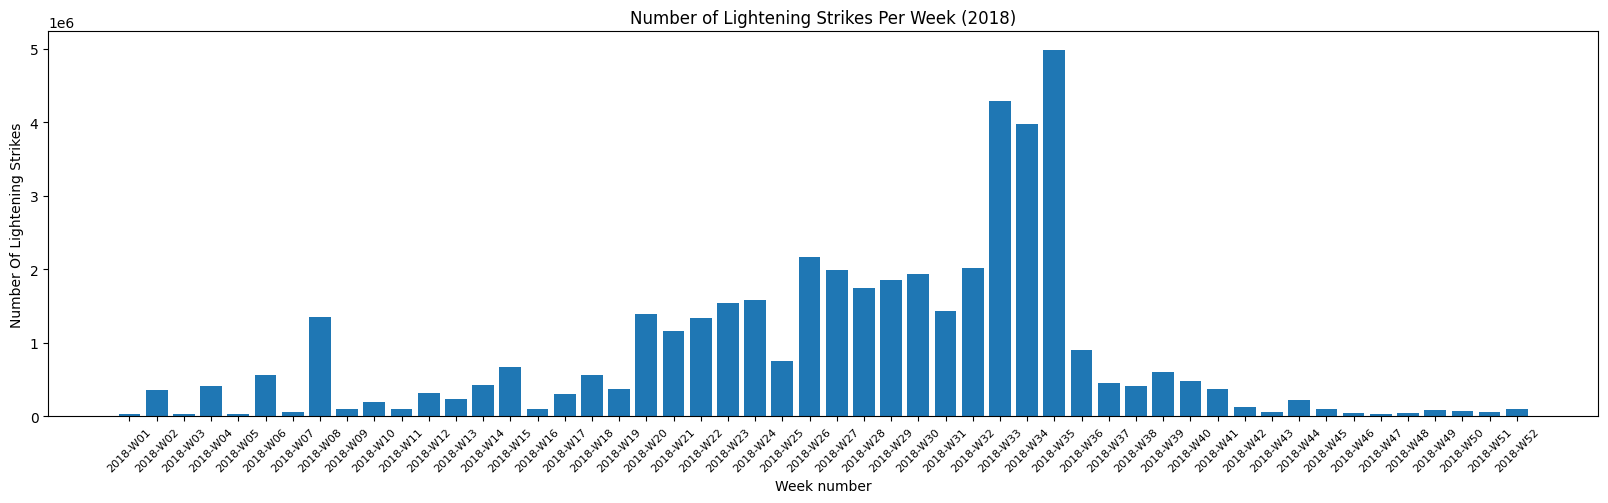

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number Of Lightening Strikes")
plt.title("Number of Lightening Strikes Per Week (2018)")
plt.xticks(rotation  = 45, fontsize = 8)

In [17]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000194
1    0.000041
2    0.000033
3    0.000038
4    0.000092
Name: number_of_strikes, dtype: float64

In [20]:
# group 2016 - 2018 data by quarter and sum. 
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()

df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str)+'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2018-Q1,3785528,3.8M
1,2018-Q2,12136148,12.1M
2,2018-Q3,26863991,26.9M
3,2018-Q4,1815322,1.8M


In [21]:
def addlables(x,y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

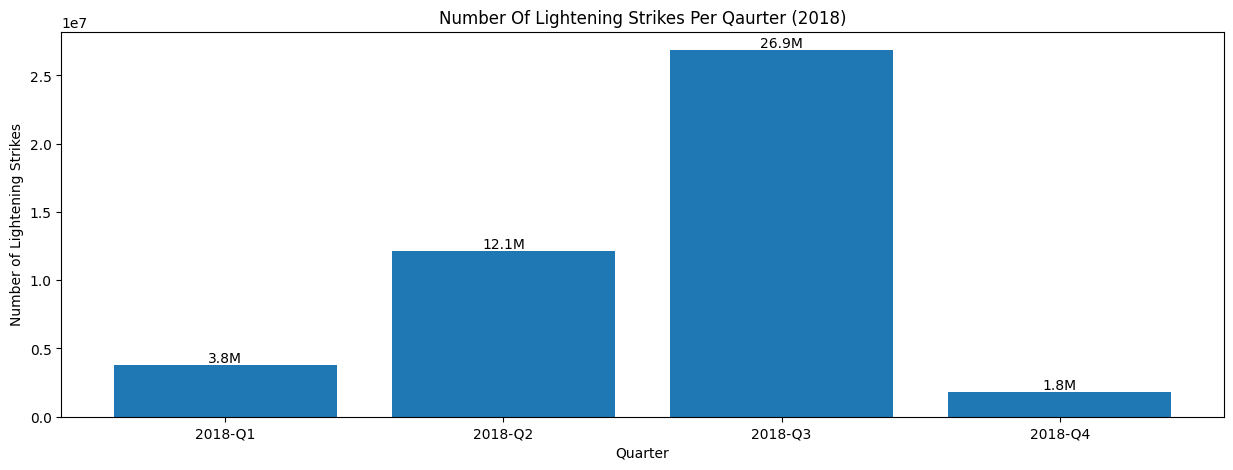

In [22]:
plt.figure(figsize= (15, 5))
plt.bar(x = df_by_quarter['quarter'], height= df_by_quarter['number_of_strikes'])
addlables(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of Lightening Strikes')
plt.title('Number Of Lightening Strikes Per Qaurter (2018)')
plt.show()

In [23]:
# now create two columns 
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2018-Q1,3785528,3.8M,Q,2018
1,2018-Q2,12136148,12.1M,Q,2018
2,2018-Q3,26863991,26.9M,Q,2018
3,2018-Q4,1815322,1.8M,Q,2018


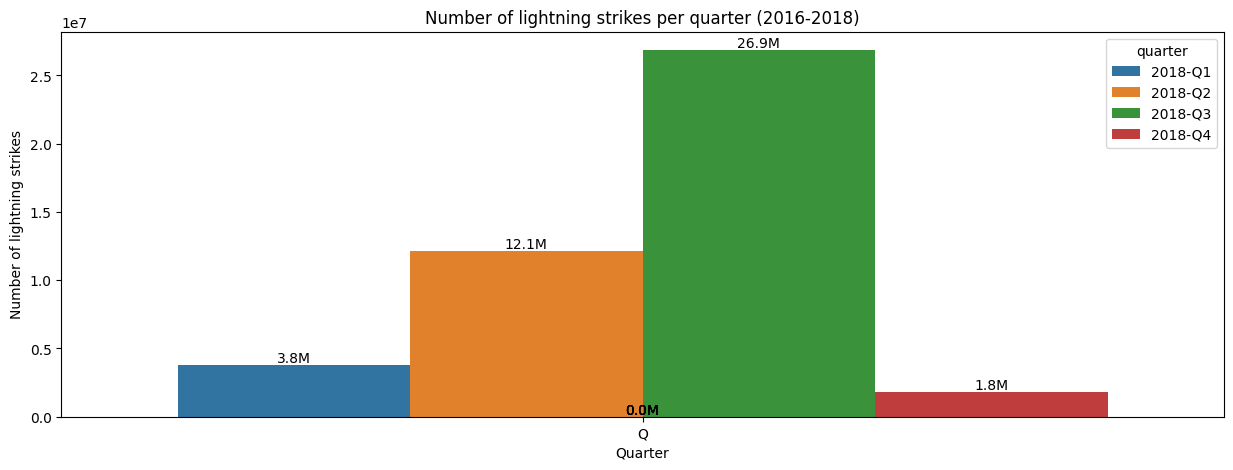

In [25]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'quarter')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()